# Data Analytics Internship level 2

## Data Processing and Feature Engineering

### Project title : Data Aggregation and Grouping

Dataset : zomato.csv
Source : Kaggle

---

 

## Task1-Data Aggregation and Grouping

*• Objective: Gain insights by grouping and summarizing key features in a dataset.*  
*• Load a dataset and perform data aggregation based on key features.*  
*• Use grouping methods to extract meaningful insights. Visualize the aggregated data effectively.*

---

In [2]:
#Core Libraries

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
#data loading 

def data_load(path) :
    data = pd.read_csv(path)
    return data

data = data_load("zomato.csv")

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
data.describe(include='object').T

,count,unique,top,freq
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1
address,51717,11495,Delivery Only,128
name,51717,8792,Cafe Coffee Day,96
online_order,51717,2,Yes,30444
book_table,51717,2,No,45268
rate,43942,64,NEW,2208
phone,50509,14926,080 43334321,216
location,51696,93,BTM,5124
rest_type,51490,93,Quick Bites,19132
dish_liked,23639,5271,Biryani,182


In [8]:
# data cleaning 

data.duplicated().sum()

np.int64(0)

In [9]:
data[data.duplicated()].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [10]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
(data.isnull().sum() / len(data))*100    #Missing value percentage

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [12]:
# drop columns 

data.drop(columns= ['phone' , 'url'],inplace= True)

In [13]:
data.drop(columns = 'dish_liked' , inplace= True)  #very high missing values

In [14]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
data['rate'] = data['rate'].astype(str)

In [16]:
data = data[data['rate'].str.contains('/')]
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
data['rate'] =  data['rate'].str.split('/').str[0].astype(float)
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', nan,
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [19]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','').astype(float)

In [20]:
data['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800.,   nan, 1900.,  180.,
        330., 2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250.,
       3500., 4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000.,
       1050., 2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,
         80.])

In [21]:
data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median(),inplace= True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_1376\903940754.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median(),inplace= True)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41665 non-null  object 
 1   name                         41665 non-null  object 
 2   online_order                 41665 non-null  object 
 3   book_table                   41665 non-null  object 
 4   rate                         41665 non-null  float64
 5   votes                        41665 non-null  int64  
 6   location                     41665 non-null  object 
 7   rest_type                    41516 non-null  object 
 8   cuisines                     41654 non-null  object 
 9   approx_cost(for two people)  41665 non-null  float64
 10  reviews_list                 41665 non-null  object 
 11  menu_item                    41665 non-null  object 
 12  listed_in(type)              41665 non-null  object 
 13  listed_in(city)      

In [23]:
data.isnull().sum()

address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                      149
cuisines                        11
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [24]:
data['rest_type'].fillna('Unknown' , inplace= True)   #very small proportion of missing values

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_1376\3431172104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rest_type'].fillna('Unknown' , inplace= True)   #very small proportion of missing values


In [25]:
data['cuisines'].fillna('Not Specified' , inplace= True)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_1376\1296680977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cuisines'].fillna('Not Specified' , inplace= True)


In [26]:
data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

#### Aggregation and Grouping


---

In [27]:
#City wise performance analysis
city_summary = (
    data.groupby('listed_in(city)').agg(
        avg_rating = ('rate' , 'mean'),
        restaurant_count = ('name' , 'count'),
        avg_cost = ('approx_cost(for two people)' ,'mean')
    )
    .reset_index()
    .sort_values(by='avg_rating' ,ascending= False)
)

In [43]:
print("\n\t\t City wise performance ")
city_summary.head()


		 City wise performance 


,listed_in(city),avg_rating,restaurant_count,avg_cost
7,Church Street,3.804262,1525,846.393443
21,MG Road,3.802023,1532,826.768930
5,Brigade Road,3.801146,1484,838.712938
27,Residency Road,3.781222,1358,816.427835
20,Lavelle Road,3.776818,1458,829.772977


 **Insight**   
• Some cities have a higher number of restaurants.  
• Popular cities show more restaurant activity.  
• City-wise grouping helps compare performance easily.

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_1376\2830858588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


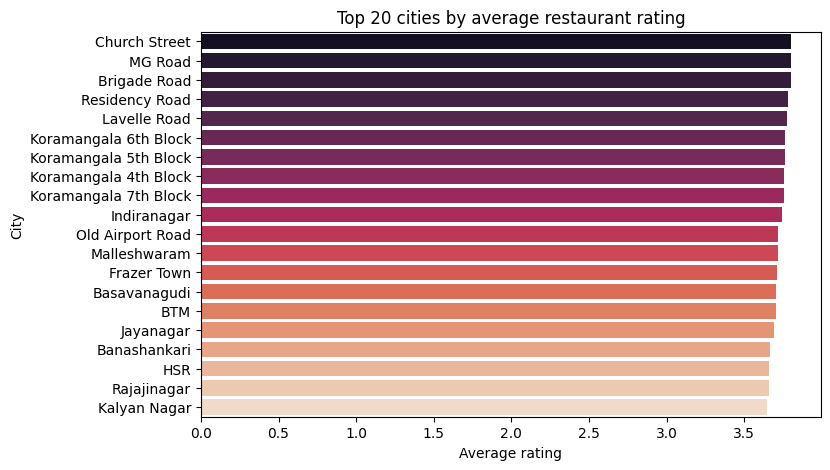

In [29]:
plt.figure(figsize= (8,5))
sns.barplot(
    data= city_summary.head(20),
    x='avg_rating',
    y='listed_in(city)',
    palette='rocket'
)
plt.title("Top 20 cities by average restaurant rating")
plt.xlabel("Average rating")
plt.ylabel("City")
plt.show()

**City -Wise Average Rating --Insights:**  

• Average ratings are different for different cities.   
• Some cities have better ratings compared to others.  
• Location plays an important role in restaurant performance.



In [30]:
#Online order vs rating

online_order_summary = (
    data.groupby('online_order').agg(
        avg_rating = ('rate','mean'),
        restaurant_count = ('name','count')
    ).reset_index()
)

In [40]:
print("\n\t\tOnline order vs rating")
online_order_summary


		Online order vs rating


,online_order,avg_rating,restaurant_count
0,No,3.65907,14459
1,Yes,3.72244,27206


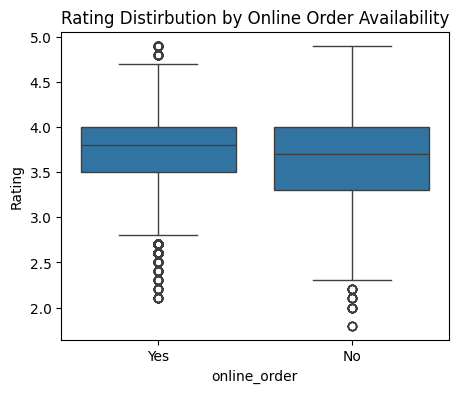

In [32]:
plt.figure(figsize=(5,4))
sns.boxplot( data = data , x = 'online_order' , y = 'rate')
plt.title("Rating Distirbution by Online Order Availability")
plt.ylabel("Rating")
plt.show()

**Rating Distribution by Online Order Availability --Insights**  

• Restaurants with online ordering have slightly higher median ratings.  
• Rating values vary more for restaurants offering online orders.  
• Online ordering has a positive impact on ratings.

In [33]:
#Cost-Based analysis

#Cost Buckets
data['cost_category'] = pd.cut(
    data['approx_cost(for two people)'],bins = [0,300,700,1500,5000],labels=['low','Medium','High','Premium']
)

In [34]:
cost_summary = (
    data.groupby('cost_category').agg(
        avg_rating = ('rate' ,'mean'),
        restaurant_count = ('name' ,'count')

    ).reset_index()
)

C:\Users\mr.ss\AppData\Local\Temp\ipykernel_1376\3400369379.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('cost_category').agg(


In [42]:

cost_summary

,cost_category,avg_rating,restaurant_count
0,low,3.567165,12587
1,Medium,3.630202,18727
2,High,3.955503,8596
3,Premium,4.156532,1753


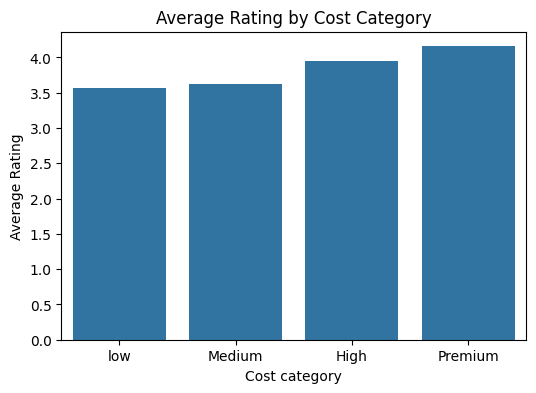

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=cost_summary,
    x = 'cost_category',
    y= 'avg_rating'
)
plt.title("Average Rating by Cost Category")
plt.xlabel("Cost category")
plt.ylabel("Average Rating")
plt.show()

**Average Rating by Cost Category--Insight**  

• Average ratings change across different cost categories.  
• Mid-range cost restaurants have better ratings.  
• Very high and very low cost categories have similar ratings.

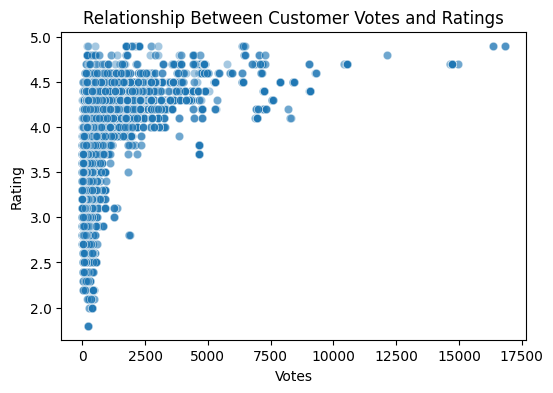

In [37]:
#Customer Engagement (Votes vs Rating)

plt.figure(figsize = (6,4))
sns.scatterplot(data = data , x = 'votes' , y = 'rate' , alpha = 0.4 )
plt.title("Relationship Between Customer Votes and Ratings")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

**Customer Votes vs Ratings --Insight**  

• Restaurants with more votes generally have higher ratings.  
• Higher customer engagement is linked to better ratings.  
• Some restaurants have good ratings even with fewer votes.

---

## Overall Insights

• Data aggregation helped in understanding restaurant performance more clearly.  
• City-wise analysis showed that location affects ratings and restaurant count.  
• Restaurants offering online ordering generally perform better.  
• Cost category analysis highlighted differences in customer satisfaction.  
• Customer engagement, measured through votes, is positively related to ratings.  
• Grouping and visualization made the dataset easier to analyze and interpret.


---